In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("/home/jiwon/workspace/img_dataset/LensCalibrated/52.png")
output = image.copy()
height, width = image.shape[:2]
maxRadius = int(1.1 * (width / 100) / 2) # hardcoded
minRadius = int(0.9 * (width / 140) / 2) # hardcoded

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image=gray, 
                           method=cv2.HOUGH_GRADIENT, 
                           dp=1.2, 
                           minDist=2*minRadius,
                           param1=50,
                           param2=50,
                           minRadius=minRadius,
                           maxRadius=maxRadius                           
                          )

Detected Marker Centers: 6


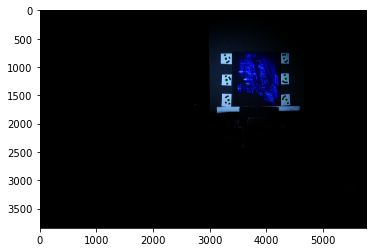

In [3]:
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.circle(output, (x, y), radius=2, color=(0, 0, 255), thickness=2)
    
    print("Detected Marker Centers:", len(circlesRound))
    cv2.imwrite("./example/circle_detected.png", output)
    plt.imshow(output)
    plt.show()

(3395, 1690)
(4240, 1690)
(3395, 737)
(4240, 737)
[[4341 1579   23]
 [3275  857   22]
 [3285 1232   23]
 [3320 1585   22]
 [4327 1210   23]
 [4301  853   23]]
[0 3 0]


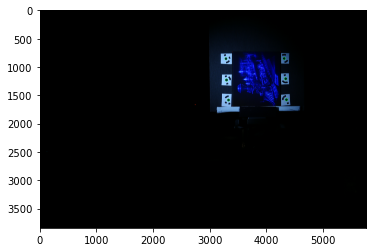

In [4]:
if circles is not None:
    image = cv2.imread("./example/circle_detected.png")
    output = image.copy()
    # numpy argmin/argmax reference: https://stackoverflow.com/a/51055927
    lower_left = np.argmax(circlesRound, axis=0)[1]
    cv2.circle(output, (circlesRound[lower_left][0] + 75, circlesRound[lower_left][1] + 105),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 75, circlesRound[lower_left][1] + 105))
    
    lower_right = np.argmax(circlesRound, axis=0)[0]
    cv2.circle(output, (circlesRound[lower_left][0] + 920, circlesRound[lower_left][1] + 105),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 920, circlesRound[lower_left][1] + 105))
    lower_right_x = circlesRound[lower_left][0] + 920
    lower_right_y = circlesRound[lower_left][1] + 105

    upper_left = np.argmin(circlesRound, axis=0)[0]
    cv2.circle(output, (circlesRound[lower_left][0] + 75, circlesRound[upper_left][1] - 120),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 75, circlesRound[upper_left][1] - 120))
    upper_left_x = circlesRound[lower_left][0] + 75
    upper_left_y = circlesRound[upper_left][1] - 120

    # upper_right = np.argmin(circlesRound, axis=0)[1]
    cv2.circle(output, (circlesRound[lower_left][0] + 920, circlesRound[upper_left][1] - 120),
        radius=2, color=(255, 0, 0), thickness=2) # offset hardcoded
    print((circlesRound[lower_left][0] + 920, circlesRound[upper_left][1] - 120))
    
    print(circlesRound)
    print(np.argmax(circlesRound, axis=0))
    cv2.imwrite("./example/corners_calculated.png", output)
    plt.imshow(output)
    plt.show()

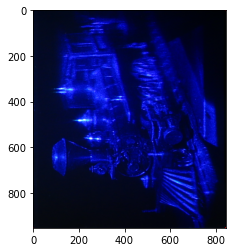

In [5]:
'''
Using corner-marked images will display the 4 corners, but will be removed in the actual preprocessing.
'''
image = cv2.imread("./example/corners_calculated.png")
output = image.copy()
# img crop reference: https://stackoverflow.com/a/54885575
output = output[upper_left_y : lower_right_y + 1, upper_left_x : lower_right_x + 1]
cv2.imwrite("./example/cropped.png", output)
plt.imshow(output)
plt.show()

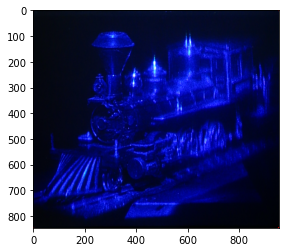

In [6]:
image = cv2.imread("./example/cropped.png")
output = image.copy()
# rotate 270 by rotating 90 by 3 times
rotated = np.rot90(output)
rotated = np.rot90(rotated)
rotated = np.rot90(rotated)
cv2.imwrite("./example/rotated.png", rotated)
plt.imshow(rotated)
plt.show()

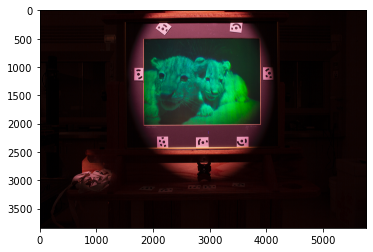

In [8]:
# convert tif to png
# reference: https://stackoverflow.com/a/42556271
from PIL import Image
image = Image.open("/home/jiwon/workspace/img_dataset/LionCubs_tif/0_6.tif")
out = image.convert("RGB")
out.save('./example/tif_convert.png', quality=100)
plt.imshow(out)
plt.show()

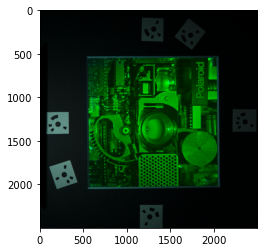

In [12]:
# center crop for polaroid dataset
# reference: https://stackoverflow.com/a/61928017
image = cv2.imread("/home/jiwon/workspace/img_dataset/polaroid/911A8034.png")
w = 2500
h = 2500
x = (image.shape[1]//2) - (w//2)
y = (image.shape[0]//2) - (h//2)
crop_img = image[y : y+h, x : x+w]
plt.imshow(crop_img)
plt.show()

3024 3024


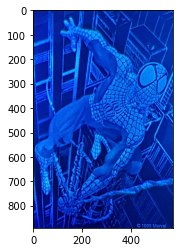

True

In [44]:
image = cv2.imread("/home/jiwon/workspace/img_dataset/spiderman_lightbulb_moving_phonecam/images_original/20220627_232926.jpg") # 3024 by 3024
print(image.shape[1], image.shape[0])

# hardcode plot needed to see which corner to crop out 
# plt.imshow(image)
# plt.plot(1210, 1020, "x", markersize=5)  # og:shorthand for green circle
# plt.plot(1840, 1020, "x", markersize=5)  # og:shorthand for green circle
# plt.plot(1210, 1950, "x", markersize=5)  # og:shorthand for green circle
# plt.plot(1840, 1950, "x", markersize=5)  # og:shorthand for green circle
# plt.show()

crop = image[1060 : 1950 + 1, 1240 : 1810 + 1]
plt.imshow(crop)
plt.show()
cv2.imwrite("./example/spiderman_crop.png", crop)